In [70]:
# Loading libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, ParameterGrid
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import defaultdict
from sklearn.base import clone

In [2]:
# Setting seeds for packages for results reproducibility
tf.random.set_seed(3)
np.random.seed(3)
random.seed(3)

The below sections is dedicated to loading the chosen datasets, getting information about the features, splitting the datasets into features and labels and necessary data preprocessing such as dropping insignificant columns and creating dummy variables. Each dataset requires slightly different preprocessing steps.

In [3]:
# Loading datasets
# Breast Cancer Wisconsin (Diagnostic) dataset
dataset_wbcd = pd.read_csv("breast_cancer.csv") 
dataset_wbcd.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Heart Failure Prediction dataset
dataset_heart = pd.read_csv("heart.csv") 
dataset_heart.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Stroke Prediction dataset
dataset_stroke = pd.read_csv("stroke.csv") 
dataset_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# Data preprocessing 
dataset_wbcd = dataset_wbcd.drop('Unnamed: 32',axis=1)
dataset_wbcd = dataset_wbcd.drop('id',axis=1)
dataset_wbcd['diagnosis'] = dataset_wbcd['diagnosis'].replace({'B':0,'M':1})
y_wbcd = dataset_wbcd['diagnosis']
X_wbcd= dataset_wbcd.drop('diagnosis',axis=1)

In [7]:
y_heart = dataset_heart['HeartDisease']
X_heart = dataset_heart.drop('HeartDisease',axis=1)
X_heart = pd.get_dummies(X_heart, drop_first=True) 
X_heart

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,False,True,False,False,False,False,False,True,False


In [8]:
dataset_stroke = dataset_stroke.dropna() # Dropping null values
dataset_stroke = dataset_stroke.drop('id',axis=1)
y_stroke = dataset_stroke['stroke']
X_stroke = dataset_stroke.drop('stroke',axis=1)
X_stroke = pd.get_dummies(X_stroke, drop_first=True) 
X_stroke

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,True,False,True,False,True,False,False,True,True,False,False
2,80.0,0,1,105.92,32.5,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,False,False,True,False,False,True,False,False,False,True,False
5,81.0,0,0,186.21,29.0,True,False,True,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,False,False,False,False,False,False,True,False,False,False,False
5106,81.0,0,0,125.20,40.0,False,False,True,False,False,True,False,True,False,True,False
5107,35.0,0,0,82.99,30.6,False,False,True,False,False,True,False,False,False,True,False
5108,51.0,0,0,166.29,25.6,True,False,True,False,True,False,False,False,True,False,False


In [9]:
# Standardizing the features
scaler = StandardScaler()
X_wbcd = scaler.fit_transform(X_wbcd)
X_heart = scaler.fit_transform(X_heart)
X_stroke = scaler.fit_transform(X_stroke)

The following section is the section that involves creating the ML algorithms, grid search for the best paramteres for each of the algorithm for each of the datasets and search for the best combinations of classifiers for classsifier ensembles for classification of the datasets.

In [10]:
# Creating the MLP model
def create_model(input_dim, neurons=32, dropout=0.2):
    """
    Create and compile a feedforward neural network for binary classification.
    :param input_dim: int
        The number of features in the input data.
    :param neurons: int, optional, default=32
        The number of neurons in the first dense layer.
    :param dropout: float, optional, default=0.2
        The dropout rate for the dropout layer, used to prevent overfitting.
    :return: keras.models.Model
        A compiled Keras model ready for training.
    """
    inputs = Input(shape=(input_dim,))
    x = Dense(neurons, activation='relu')(inputs)
    x = Dropout(dropout)(x)
    x = Dense(neurons // 2, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [11]:
# Hyperparameter grid for MLP
param_grid_mlp = {
    'neurons': [32, 64, 128],
    'dropout': [0.2, 0.4],
    'batch_size': [32, 64],
    'epochs': [100, 200]
}

In [12]:
def cross_val_grid_search(X, y, param_grid, input_dim, n_splits=5, validation_size=0.2):
    """
    Perform cross-validation with grid search for hyperparameter tuning on a neural network.

    :param X: array-like
        The feature matrix used for training and testing.
    :param y: array-like
        The target vector used for training and testing.
    :param param_grid: dict
        A dictionary with hyperparameters and their corresponding values to be tested.
    :param input_dim: int
        The number of features in the input data.
    :param n_splits: int, optional, default=5
        The number of folds for k-fold cross-validation.
    :param validation_size: float, optional, default=0.2
        The proportion of the training data to be used as the validation set.
    
    :return: tuple
        A tuple containing three elements:
        - best_params_list (list): A list of dictionaries with the best hyperparameters for each fold.
        - best_scores (list): A list of the best F1-scores for each fold.
        - test_metrics (list): A list of dictionaries containing accuracy, precision, recall, and F1-score for the test set of each fold.
    """
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=3)
    best_scores = []
    best_params_list = []
    test_metrics = []
    for train_val_index, test_index in cv.split(X):
        X_train_val, X_test = X[train_val_index], X[test_index]
        y_train_val, y_test = np.array(y)[train_val_index], np.array(y)[test_index]
        X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=validation_size, random_state=3)
        best_score = 0
        best_params = None
        best_model = None
        for params in ParameterGrid(param_grid):
            neurons = params['neurons']
            dropout = params['dropout']
            batch_size = params['batch_size']
            epochs = params['epochs']
            smote = SMOTE(random_state=3)
            X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
            model = create_model(input_dim=input_dim, neurons=neurons, dropout=dropout)
            model.fit(X_train_smote, y_train_smote, validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=0)
            val_predictions = model.predict(X_val)
            val_predictions = (val_predictions > 0.5).astype(int)
            val_f1_score_class_1 = f1_score(y_val, val_predictions, pos_label=1)
            if val_f1_score_class_1 > best_score:
                best_score = val_f1_score_class_1
                best_params = params
                best_model = model
        best_scores.append(best_score)
        best_params_list.append(best_params)
        test_predictions = best_model.predict(X_test)
        test_predictions = (test_predictions > 0.5).astype(int)
        test_acc = accuracy_score(y_test, test_predictions)
        test_prec = precision_score(y_test, test_predictions)
        test_rec = recall_score(y_test, test_predictions)
        test_f1 = f1_score(y_test, test_predictions)
        test_metrics.append({
            'accuracy': test_acc,
            'precision': test_prec,
            'recall': test_rec,
            'f1_score': test_f1
        })

    return best_params_list, best_scores, test_metrics

In [13]:
# Performing cross-validation and grid search for MLP for the datasets.
best_params_list_wbcd, best_scores_wbcd, test_metrics_wbcd = cross_val_grid_search(X_wbcd, y_wbcd, param_grid_mlp, X_wbcd.shape[1])
best_params_list_heart, best_scores_heart, test_metrics_heart = cross_val_grid_search(X_heart, y_heart, param_grid_mlp, X_heart.shape[1])
best_params_list_stroke, best_scores_stroke, test_metrics_stroke = cross_val_grid_search(X_stroke, y_stroke, param_grid_mlp, X_stroke.shape[1])

C:\Users\sandr\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\sandr\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001BBF2DA2FC0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━

In [14]:
best_params_list_wbcd

[{'batch_size': 32, 'dropout': 0.2, 'epochs': 100, 'neurons': 32},
 {'batch_size': 32, 'dropout': 0.2, 'epochs': 200, 'neurons': 32},
 {'batch_size': 32, 'dropout': 0.2, 'epochs': 100, 'neurons': 64},
 {'batch_size': 64, 'dropout': 0.2, 'epochs': 100, 'neurons': 32},
 {'batch_size': 64, 'dropout': 0.2, 'epochs': 100, 'neurons': 32}]

In [15]:
best_params_list_heart

[{'batch_size': 64, 'dropout': 0.4, 'epochs': 100, 'neurons': 32},
 {'batch_size': 64, 'dropout': 0.4, 'epochs': 200, 'neurons': 64},
 {'batch_size': 64, 'dropout': 0.2, 'epochs': 200, 'neurons': 128},
 {'batch_size': 32, 'dropout': 0.4, 'epochs': 200, 'neurons': 32},
 {'batch_size': 64, 'dropout': 0.2, 'epochs': 100, 'neurons': 32}]

In [16]:
best_params_list_stroke

[{'batch_size': 32, 'dropout': 0.4, 'epochs': 200, 'neurons': 32},
 {'batch_size': 32, 'dropout': 0.4, 'epochs': 100, 'neurons': 32},
 {'batch_size': 32, 'dropout': 0.2, 'epochs': 200, 'neurons': 32},
 {'batch_size': 64, 'dropout': 0.4, 'epochs': 200, 'neurons': 64},
 {'batch_size': 32, 'dropout': 0.4, 'epochs': 200, 'neurons': 32}]

In [17]:
def evaluate_params(X, y, params_list, input_dim, n_splits=5):
    """
    Evaluate a list of parameter sets using cross-validation.

    :param X: array-like
        The feature matrix used for training and testing.
    :param y: array-like
        The target vector used for training and testing.
    :param params_list: list of dict
        A list of dictionaries with hyperparameters to be tested.
    :param input_dim: int
        The number of features in the input data.
    :param n_splits: int, optional, default=5
        The number of folds for k-fold cross-validation.
    
    :return: tuple
        A tuple containing two elements:
        - best_params (dict): The best hyperparameters based on the highest average F1-score.
        - best_metrics (list): A list of dictionaries containing average accuracy, precision, recall, and F1-score for the best hyperparameters.
    """
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=3)
    param_f1_scores = defaultdict(list)
    param_metrics = defaultdict(list)
    for params in params_list:
        f1_scores = []
        metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}
        for train_index, val_index in cv.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = np.array(y)[train_index], np.array(y)[val_index]
            smote = SMOTE(random_state=3)
            X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
            model = create_model(input_dim=input_dim, neurons=params['neurons'], dropout=params['dropout'])
            model.fit(X_train_smote, y_train_smote, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)
            val_predictions = model.predict(X_val)
            val_predictions = (val_predictions > 0.5).astype(int)
            metrics['accuracy'].append(accuracy_score(y_val, val_predictions))
            metrics['precision'].append(precision_score(y_val, val_predictions))
            metrics['recall'].append(recall_score(y_val, val_predictions))
            f1_scores.append(f1_score(y_val, val_predictions))
        avg_accuracy = np.mean(metrics['accuracy'])
        avg_precision = np.mean(metrics['precision'])
        avg_recall = np.mean(metrics['recall'])
        avg_f1_score = np.mean(f1_scores)
        param_f1_scores[tuple(params.items())].append(avg_f1_score)
        param_metrics[tuple(params.items())].append({
            'accuracy': avg_accuracy,
            'precision': avg_precision,
            'recall': avg_recall,
            'f1_score': avg_f1_score
        })
    avg_param_f1_scores = {k: np.mean(v) for k, v in param_f1_scores.items()}
    best_params_tuple = max(avg_param_f1_scores, key=avg_param_f1_scores.get)
    best_params = dict(best_params_tuple)
    best_metrics = param_metrics[best_params_tuple]

    return best_params, best_metrics

In [18]:
# Evaluating the best parameters for each dataset
input_dim_wbcd = X_wbcd.shape[1]
unique_params_wbcd = [dict(t) for t in {tuple(d.items()) for d in best_params_list_wbcd}]
best_params_wbcd, best_metrics = evaluate_params(X_wbcd, y_wbcd, unique_params_wbcd, input_dim_wbcd)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [19]:
best_params_wbcd

{'batch_size': 64, 'dropout': 0.2, 'epochs': 100, 'neurons': 32}

In [20]:
best_metrics

[{'accuracy': 0.982425089271852,
  'precision': 0.9813906008554143,
  'recall': 0.9720556826849733,
  'f1_score': 0.9766056452613627}]

In [21]:
def final_cross_validation(X, y, best_params, input_dim, n_splits=5):
    """
    Perform final cross-validation using the best hyperparameters.

    :param X: array-like
        The feature matrix used for training and testing.
    :param y: array-like
        The target vector used for training and testing.
    :param best_params: dict
        The best hyperparameters found from previous evaluations.
    :param input_dim: int
        The number of features in the input data.
    :param n_splits: int, optional, default=5
        The number of folds for k-fold cross-validation.

    :return: tuple
        A tuple containing three elements:
        - final_scores (list): A list of dictionaries with accuracy, precision, recall, and F1-score for each fold.
        - final_histories (list): A list of training histories for each fold.
        - final_confusion_matrices (list): A list of confusion matrices for each fold.
    """
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=3)
    final_scores = []
    final_histories = []
    final_confusion_matrices = []
    for train_index, test_index in cv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
        smote = SMOTE(random_state=3)
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
        model = create_model(input_dim=input_dim, neurons=best_params['neurons'], dropout=best_params['dropout'])
        history = model.fit(X_train_smote, y_train_smote, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0, validation_data=(X_test, y_test))
        test_predictions = model.predict(X_test)
        test_predictions = (test_predictions > 0.5).astype(int)
        test_acc = accuracy_score(y_test, test_predictions)
        test_prec = precision_score(y_test, test_predictions)
        test_rec = recall_score(y_test, test_predictions)
        test_f1 = f1_score(y_test, test_predictions)
        test_confusion_matrix = confusion_matrix(y_test, test_predictions)
        final_scores.append({
            'accuracy': test_acc,
            'precision': test_prec,
            'recall': test_rec,
            'f1_score': test_f1
        })
        final_histories.append(history.history)
        final_confusion_matrices.append(test_confusion_matrix)
    return final_scores, final_histories, final_confusion_matrices

In [22]:
final_scores, final_histories, final_confusion_matrices = final_cross_validation(X_wbcd, y_wbcd, best_params_wbcd, input_dim_wbcd)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [23]:
final_scores

[{'accuracy': 0.956140350877193,
  'precision': 0.926829268292683,
  'recall': 0.95,
  'f1_score': 0.9382716049382716},
 {'accuracy': 0.9912280701754386,
  'precision': 0.975609756097561,
  'recall': 1.0,
  'f1_score': 0.9876543209876543},
 {'accuracy': 0.9736842105263158,
  'precision': 0.9787234042553191,
  'recall': 0.9583333333333334,
  'f1_score': 0.968421052631579},
 {'accuracy': 0.9736842105263158,
  'precision': 0.972972972972973,
  'recall': 0.9473684210526315,
  'f1_score': 0.96},
 {'accuracy': 0.9646017699115044,
  'precision': 0.9375,
  'recall': 0.9782608695652174,
  'f1_score': 0.9574468085106383}]

In [24]:
accuracies = [score['accuracy'] for score in final_scores]
precisions = [score['precision'] for score in final_scores]
recalls = [score['recall'] for score in final_scores]
f1_scores = [score['f1_score'] for score in final_scores]
average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)
average_f1_score = np.mean(f1_scores)

Average Accuracy: 0.9718677224033534
Average Precision: 0.9583270803237072
Average Recall: 0.9667925247902364
Average F1 Score: 0.9623587574136285


In [25]:
final_histories

[{'accuracy': [0.583038866519928,
   0.7597172856330872,
   0.8745583295822144,
   0.9222614765167236,
   0.9275618195533752,
   0.9381625652313232,
   0.9416961073875427,
   0.9487632513046265,
   0.9558303952217102,
   0.9540635943412781,
   0.9575971961021423,
   0.9646643400192261,
   0.9699646830558777,
   0.9699646830558777,
   0.9734982252120972,
   0.9787985682487488,
   0.982332170009613,
   0.982332170009613,
   0.9805653691291809,
   0.982332170009613,
   0.982332170009613,
   0.9858657121658325,
   0.9840989112854004,
   0.9840989112854004,
   0.9858657121658325,
   0.9876325130462646,
   0.9876325130462646,
   0.9929328560829163,
   0.9876325130462646,
   0.9858657121658325,
   0.9858657121658325,
   0.9893993139266968,
   0.9893993139266968,
   0.9893993139266968,
   0.9929328560829163,
   0.9893993139266968,
   0.9911660552024841,
   0.9946996569633484,
   0.9929328560829163,
   0.9893993139266968,
   0.9929328560829163,
   0.9911660552024841,
   0.9893993139266968,
   0

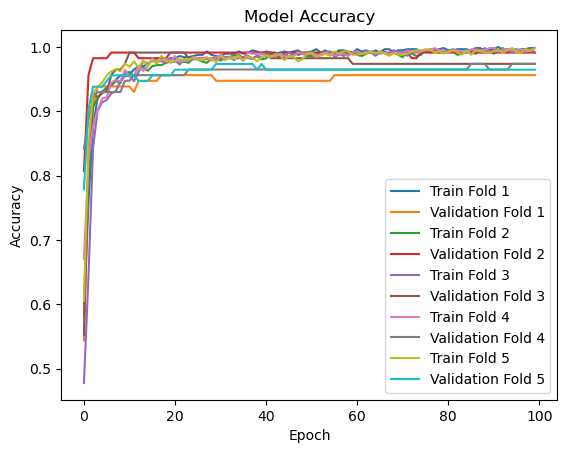

In [26]:
# Training history of MLP across different CV folds for WBCD
for i, history in enumerate(final_histories):
    plt.plot(history['accuracy'], label=f'Train Fold {i+1}')
    plt.plot(history['val_accuracy'], label=f'Validation Fold {i+1}')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

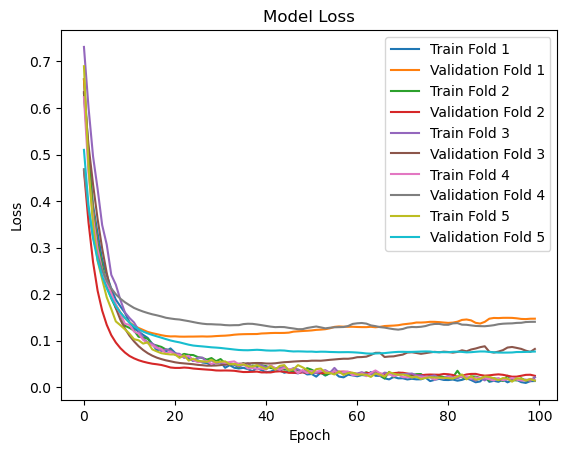

In [27]:
for i, history in enumerate(final_histories):
    plt.plot(history['loss'], label=f'Train Fold {i+1}')
    plt.plot(history['val_loss'], label=f'Validation Fold {i+1}')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
final_confusion_matrices

[array([[71,  3],
        [ 2, 38]], dtype=int64),
 array([[73,  1],
        [ 0, 40]], dtype=int64),
 array([[65,  1],
        [ 2, 46]], dtype=int64),
 array([[75,  1],
        [ 2, 36]], dtype=int64),
 array([[64,  3],
        [ 1, 45]], dtype=int64)]

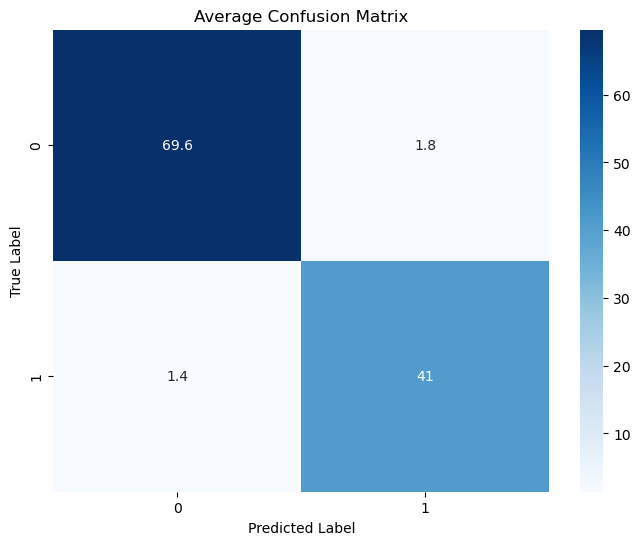

In [29]:
# Average confusion matrix across all folds for MLP trained on WBCD
sum_confusion_matrix = np.sum(final_confusion_matrices, axis=0)
average_confusion_matrix = sum_confusion_matrix / len(final_confusion_matrices)

plt.figure(figsize=(8, 6))
sns.heatmap(average_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [30]:
input_dim_heart = X_heart.shape[1]
unique_params_heart = [dict(t) for t in {tuple(d.items()) for d in best_params_list_heart}]
best_params_heart, best_metrics_heart = evaluate_params(X_heart, y_heart, unique_params_heart, input_dim_heart)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [31]:
final_scores_heart, final_histories_heart, final_confusion_matrices_heart = final_cross_validation(X_heart, y_heart, best_params_heart, input_dim_heart)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [32]:
final_scores_heart

[{'accuracy': 0.9021739130434783,
  'precision': 0.925531914893617,
  'recall': 0.8877551020408163,
  'f1_score': 0.90625},
 {'accuracy': 0.8804347826086957,
  'precision': 0.8899082568807339,
  'recall': 0.9065420560747663,
  'f1_score': 0.8981481481481481},
 {'accuracy': 0.8532608695652174,
  'precision': 0.8828828828828829,
  'recall': 0.875,
  'f1_score': 0.8789237668161435},
 {'accuracy': 0.8524590163934426,
  'precision': 0.8349514563106796,
  'recall': 0.8958333333333334,
  'f1_score': 0.864321608040201},
 {'accuracy': 0.8797814207650273,
  'precision': 0.8762886597938144,
  'recall': 0.8947368421052632,
  'f1_score': 0.8854166666666666}]

In [33]:
final_histories_heart

[{'accuracy': [0.4146341383457184,
   0.6317073106765747,
   0.7585365772247314,
   0.8231707215309143,
   0.8292682766914368,
   0.8426828980445862,
   0.8487805128097534,
   0.8463414907455444,
   0.8426828980445862,
   0.8512195348739624,
   0.8548780679702759,
   0.8524390459060669,
   0.8536585569381714,
   0.8658536672592163,
   0.8634146451950073,
   0.8560975790023804,
   0.8658536672592163,
   0.8609756231307983,
   0.8743902444839478,
   0.8597561120986938,
   0.8597561120986938,
   0.8670731782913208,
   0.8743902444839478,
   0.8780487775802612,
   0.8695122003555298,
   0.8658536672592163,
   0.8670731782913208,
   0.8682926893234253,
   0.8634146451950073,
   0.8695122003555298,
   0.8780487775802612,
   0.8731707334518433,
   0.8646341562271118,
   0.8658536672592163,
   0.8719512224197388,
   0.8768292665481567,
   0.8731707334518433,
   0.8780487775802612,
   0.8756097555160522,
   0.8817073106765747,
   0.8878048658370972,
   0.8792682886123657,
   0.8780487775802612,

In [34]:
final_confusion_matrices_heart

[array([[79,  7],
        [11, 87]], dtype=int64),
 array([[65, 12],
        [10, 97]], dtype=int64),
 array([[59, 13],
        [14, 98]], dtype=int64),
 array([[70, 17],
        [10, 86]], dtype=int64),
 array([[76, 12],
        [10, 85]], dtype=int64)]

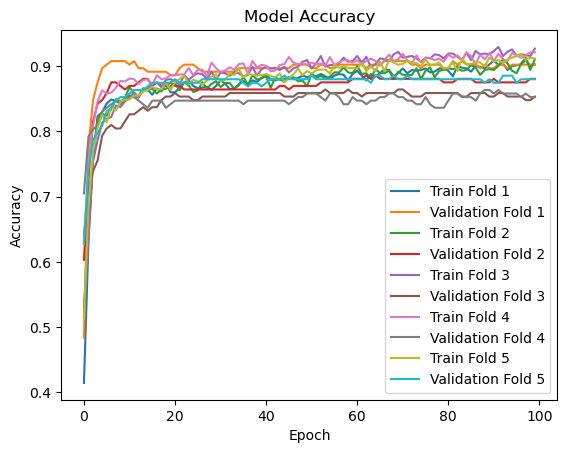

In [35]:
# Training history of MLP across different CV folds for HFP
for i, history in enumerate(final_histories_heart):
    plt.plot(history['accuracy'], label=f'Train Fold {i+1}')
    plt.plot(history['val_accuracy'], label=f'Validation Fold {i+1}')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

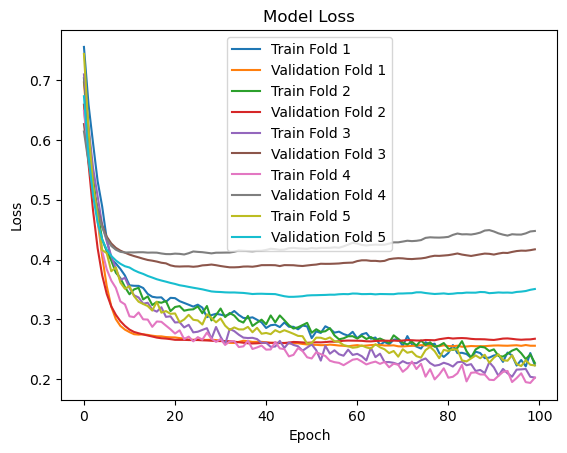

In [36]:
for i, history in enumerate(final_histories_heart):
    plt.plot(history['loss'], label=f'Train Fold {i+1}')
    plt.plot(history['val_loss'], label=f'Validation Fold {i+1}')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
input_dim_stroke = X_stroke.shape[1]
unique_params_stroke = [dict(t) for t in {tuple(d.items()) for d in best_params_list_stroke}]
best_params_stroke, best_metrics_stroke = evaluate_params(X_stroke, y_stroke, unique_params_stroke, input_dim_stroke)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [38]:
final_scores_stroke, final_histories_stroke, final_confusion_matrices_stroke = final_cross_validation(X_stroke, y_stroke, best_params_stroke, input_dim_stroke)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [39]:
final_scores_stroke

[{'accuracy': 0.8635437881873728,
  'precision': 0.08695652173913043,
  'recall': 0.2564102564102564,
  'f1_score': 0.12987012987012986},
 {'accuracy': 0.8391038696537678,
  'precision': 0.14193548387096774,
  'recall': 0.46808510638297873,
  'f1_score': 0.21782178217821782},
 {'accuracy': 0.8207739307535642,
  'precision': 0.12021857923497267,
  'recall': 0.5945945945945946,
  'f1_score': 0.2},
 {'accuracy': 0.824847250509165,
  'precision': 0.09937888198757763,
  'recall': 0.37209302325581395,
  'f1_score': 0.1568627450980392},
 {'accuracy': 0.8063200815494393,
  'precision': 0.10270270270270271,
  'recall': 0.4418604651162791,
  'f1_score': 0.16666666666666666}]

In [40]:
final_histories_stroke

[{'accuracy': [0.6759382486343384,
   0.766435980796814,
   0.7809422612190247,
   0.7923875451087952,
   0.8050305843353271,
   0.8070268630981445,
   0.8119510412216187,
   0.8132818937301636,
   0.8167420625686646,
   0.8160766363143921,
   0.8221985697746277,
   0.8252595067024231,
   0.8288528323173523,
   0.8299174904823303,
   0.8324460983276367,
   0.8316475749015808,
   0.8369709849357605,
   0.83524090051651,
   0.8396326899528503,
   0.8400319218635559,
   0.8432259559631348,
   0.8406973481178284,
   0.8430929183959961,
   0.846286952495575,
   0.8514772653579712,
   0.846286952495575,
   0.8486824631690979,
   0.8521426916122437,
   0.8552036285400391,
   0.8516103029251099,
   0.85467129945755,
   0.8598616123199463,
   0.856534481048584,
   0.8590630888938904,
   0.8601277470588684,
   0.8611924648284912,
   0.8622571229934692,
   0.8643864989280701,
   0.8637210726737976,
   0.8630556464195251,
   0.8670482039451599,
   0.867846667766571,
   0.8717061281204224,
   0.869

In [41]:
final_confusion_matrices_stroke

[array([[838, 105],
        [ 29,  10]], dtype=int64),
 array([[802, 133],
        [ 25,  22]], dtype=int64),
 array([[784, 161],
        [ 15,  22]], dtype=int64),
 array([[794, 145],
        [ 27,  16]], dtype=int64),
 array([[772, 166],
        [ 24,  19]], dtype=int64)]

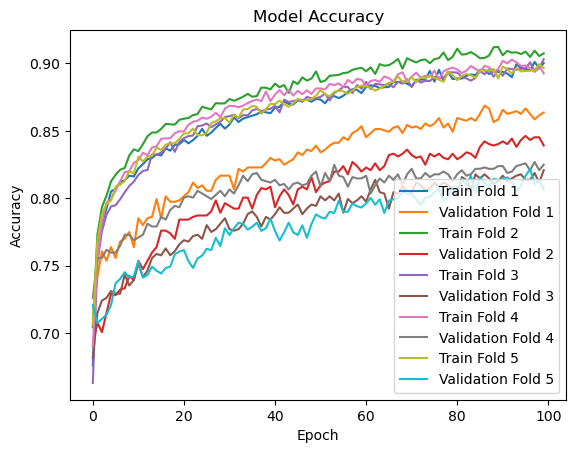

In [42]:
# Training history of MLP across different CV folds for SPD
for i, history in enumerate(final_histories_stroke):
    plt.plot(history['accuracy'], label=f'Train Fold {i+1}')
    plt.plot(history['val_accuracy'], label=f'Validation Fold {i+1}')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

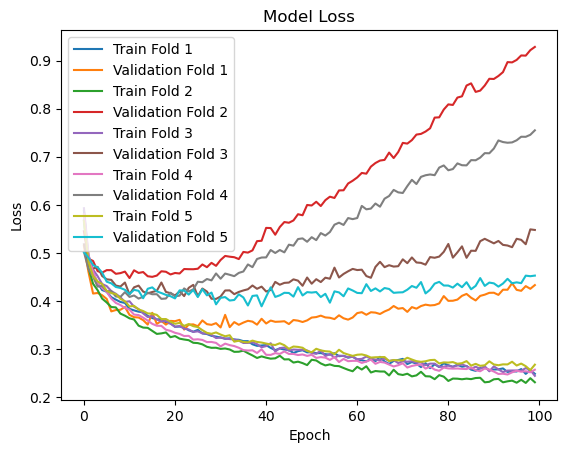

In [43]:
for i, history in enumerate(final_histories_stroke):
    plt.plot(history['loss'], label=f'Train Fold {i+1}')
    plt.plot(history['val_loss'], label=f'Validation Fold {i+1}')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
def cross_val_grid_search_classifiers(classifiers, param_grids, X, y, n_splits=5, validation_size=0.2):
    """
    Perform cross-validated grid search for hyperparameter tuning of multiple classifiers and evaluate their performance.
    :param classifiers: dict
        A dictionary where keys are classifier names and values are classifier instances.
    :param param_grids: dict
        A dictionary where keys are classifier names and values are parameter grids to search over.
    :param X: array-like
        The feature matrix used for training and testing.
    :param y: array-like
        The target vector used for training and testing.
    :param n_splits: int, optional, default=5
        The number of folds for cross-validation.
    :param validation_size: float, optional, default=0.2
        The proportion of the training data to use for validation during grid search.
    :return: tuple
        A tuple containing three elements:
            - best_params_list: list of dict
                Each dictionary contains the best hyperparameters found for each classifier.
            - best_scores: list of float
                The best validation F1 scores for each classifier.
            - test_metrics: list of dict
                Each dictionary contains the evaluation metrics (accuracy, precision, recall, and F1 score) on the test set for each classifier.
    """
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=3)
    best_params_list = []
    best_scores = []
    test_metrics = []

    for clf_name, clf in classifiers.items():
        param_grid = param_grids.get(clf_name, {})
        
        for train_val_index, test_index in cv.split(X):
            X_train_val, X_test = X[train_val_index], X[test_index]
            y_train_val, y_test = np.array(y)[train_val_index], np.array(y)[test_index]
            X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=validation_size, random_state=3)

            smote = SMOTE(random_state=3)
            X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
            
            best_score = 0
            best_params = None
            best_clf = None

            for params in ParameterGrid(param_grid):
                current_clf = clf

                current_clf.set_params(**params)
                current_clf.fit(X_train_smote, y_train_smote)

                val_predictions = current_clf.predict(X_val)
                val_f1_score = f1_score(y_val, val_predictions, pos_label=1)

                if val_f1_score > best_score:
                    best_score = val_f1_score
                    best_params = params
                    best_clf = current_clf

            best_params_list.append({clf_name: best_params})
            best_scores.append(best_score)

            test_predictions = best_clf.predict(X_test)
            test_acc = accuracy_score(y_test, test_predictions)
            test_prec = precision_score(y_test, test_predictions)
            test_rec = recall_score(y_test, test_predictions)
            test_f1 = f1_score(y_test, test_predictions)

            test_metrics.append({
                'Classifier': clf_name,
                'Accuracy': test_acc,
                'Precision': test_prec,
                'Recall': test_rec,
                'F1 Score': test_f1
            })

    return best_params_list, best_scores, test_metrics

In [46]:
# Initializng the rest of ML algorithms
classifiers = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'ExtraTrees': ExtraTreesClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'NaiveBayes': GaussianNB(),
    'GradientBoosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier()
}


In [47]:
# Defining hyperparameter grid for grid search of the ML algorithms
param_grids = {
    'RandomForest': {'n_estimators': [100, 500, 1000]},
    'LogisticRegression': {'max_iter': [1000, 2000, 3000]},
    'SVC': {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]},
    'ExtraTrees': {'n_estimators': [100, 500, 1000]},
    'DecisionTree': {'max_depth': [None, 10, 50, 100]},
    'NaiveBayes': {},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 7]},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
}

In [48]:
best_params_list_classifiers_wbcd, best_scores_classifiers_wbcd, test_metrics_classifiers_wbcd = cross_val_grid_search_classifiers(
    classifiers, param_grids, X_wbcd, y_wbcd)

In [49]:
best_params_list_classifiers_heart, best_scores_classifiers_heart, test_metrics_classifiers_heart = cross_val_grid_search_classifiers(
    classifiers, param_grids, X_heart, y_heart)

In [50]:
best_params_list_classifiers_stroke, best_scores_classifiers_stroke, test_metrics_classifiers_stroke = cross_val_grid_search_classifiers(
    classifiers, param_grids, X_stroke, y_stroke)

In [53]:
best_params_list_classifiers_wbcd

[{'RandomForest': {'n_estimators': 500}},
 {'RandomForest': {'n_estimators': 500}},
 {'RandomForest': {'n_estimators': 100}},
 {'RandomForest': {'n_estimators': 1000}},
 {'RandomForest': {'n_estimators': 500}},
 {'LogisticRegression': {'max_iter': 1000}},
 {'LogisticRegression': {'max_iter': 1000}},
 {'LogisticRegression': {'max_iter': 1000}},
 {'LogisticRegression': {'max_iter': 1000}},
 {'LogisticRegression': {'max_iter': 1000}},
 {'SVC': {'C': 0.1, 'kernel': 'linear'}},
 {'SVC': {'C': 1, 'kernel': 'rbf'}},
 {'SVC': {'C': 10, 'kernel': 'rbf'}},
 {'SVC': {'C': 1, 'kernel': 'rbf'}},
 {'SVC': {'C': 1, 'kernel': 'rbf'}},
 {'ExtraTrees': {'n_estimators': 500}},
 {'ExtraTrees': {'n_estimators': 100}},
 {'ExtraTrees': {'n_estimators': 100}},
 {'ExtraTrees': {'n_estimators': 500}},
 {'ExtraTrees': {'n_estimators': 500}},
 {'DecisionTree': {'max_depth': None}},
 {'DecisionTree': {'max_depth': None}},
 {'DecisionTree': {'max_depth': None}},
 {'DecisionTree': {'max_depth': None}},
 {'DecisionTr

In [54]:
best_params_list_classifiers_heart

[{'RandomForest': {'n_estimators': 1000}},
 {'RandomForest': {'n_estimators': 1000}},
 {'RandomForest': {'n_estimators': 1000}},
 {'RandomForest': {'n_estimators': 500}},
 {'RandomForest': {'n_estimators': 100}},
 {'LogisticRegression': {'max_iter': 1000}},
 {'LogisticRegression': {'max_iter': 1000}},
 {'LogisticRegression': {'max_iter': 1000}},
 {'LogisticRegression': {'max_iter': 1000}},
 {'LogisticRegression': {'max_iter': 1000}},
 {'SVC': {'C': 1, 'kernel': 'rbf'}},
 {'SVC': {'C': 0.1, 'kernel': 'linear'}},
 {'SVC': {'C': 10, 'kernel': 'rbf'}},
 {'SVC': {'C': 1, 'kernel': 'rbf'}},
 {'SVC': {'C': 0.1, 'kernel': 'rbf'}},
 {'ExtraTrees': {'n_estimators': 500}},
 {'ExtraTrees': {'n_estimators': 500}},
 {'ExtraTrees': {'n_estimators': 500}},
 {'ExtraTrees': {'n_estimators': 100}},
 {'ExtraTrees': {'n_estimators': 500}},
 {'DecisionTree': {'max_depth': 10}},
 {'DecisionTree': {'max_depth': 10}},
 {'DecisionTree': {'max_depth': 10}},
 {'DecisionTree': {'max_depth': 10}},
 {'DecisionTree':

In [55]:
best_params_list_classifiers_stroke

[{'RandomForest': {'n_estimators': 100}},
 {'RandomForest': {'n_estimators': 1000}},
 {'RandomForest': {'n_estimators': 100}},
 {'RandomForest': {'n_estimators': 100}},
 {'RandomForest': {'n_estimators': 100}},
 {'LogisticRegression': {'max_iter': 1000}},
 {'LogisticRegression': {'max_iter': 1000}},
 {'LogisticRegression': {'max_iter': 1000}},
 {'LogisticRegression': {'max_iter': 1000}},
 {'LogisticRegression': {'max_iter': 1000}},
 {'SVC': {'C': 0.1, 'kernel': 'linear'}},
 {'SVC': {'C': 1, 'kernel': 'linear'}},
 {'SVC': {'C': 1, 'kernel': 'linear'}},
 {'SVC': {'C': 10, 'kernel': 'linear'}},
 {'SVC': {'C': 0.1, 'kernel': 'rbf'}},
 {'ExtraTrees': {'n_estimators': 500}},
 {'ExtraTrees': {'n_estimators': 100}},
 {'ExtraTrees': {'n_estimators': 100}},
 {'ExtraTrees': {'n_estimators': 1000}},
 {'ExtraTrees': {'n_estimators': 100}},
 {'DecisionTree': {'max_depth': None}},
 {'DecisionTree': {'max_depth': None}},
 {'DecisionTree': {'max_depth': 100}},
 {'DecisionTree': {'max_depth': 100}},
 {'

In [56]:
def evaluate_params_classifiers(X, y, params_list, classifiers, n_splits=5):
    """
    Evaluate multiple parameter configurations for each classifier using cross-validation and select the best-performing parameters.
    :param X: array-like
        The feature matrix used for training and validation.
    :param y: array-like
        The target vector used for training and validation.
    :param params_list: list of dict
        A list of dictionaries where each dictionary contains parameter configurations for one or more classifiers.
    :param classifiers: dict
        A dictionary where keys are classifier names and values are classifier instances.
    :param n_splits: int, optional, default=5
        The number of folds for cross-validation.
    :return: tuple
        A tuple containing two dictionaries:
            - best_params: dict
                Each key is a classifier name, and the corresponding value is the best parameter configuration found.
            - best_metrics: dict
                Each key is a classifier name, and the corresponding value is a dictionary containing the average evaluation metrics (accuracy, precision, recall, and F1 score) for the best parameter configuration.
    """
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=3)
    
    best_params = {}
    best_metrics = {}
    
    for clf_name in classifiers.keys():
        clf_best_f1_score = -1
        clf_best_params = None
        clf_best_metrics = None
        
        for param_dict in params_list:
            if clf_name in param_dict:
                clf_params = param_dict[clf_name]
                f1_scores = []
                metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}
                
                for train_index, val_index in cv.split(X):
                    X_train, X_val = X[train_index], X[val_index]
                    y_train, y_val = np.array(y)[train_index], np.array(y)[val_index]
                    
                    smote = SMOTE(random_state=3)
                    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
                    
                    clf = clone(classifiers[clf_name])
                    clf.set_params(**clf_params)
                    clf.fit(X_train_smote, y_train_smote)
                    
                    val_predictions = clf.predict(X_val)
                    
                    metrics['accuracy'].append(accuracy_score(y_val, val_predictions))
                    metrics['precision'].append(precision_score(y_val, val_predictions))
                    metrics['recall'].append(recall_score(y_val, val_predictions))
                    f1_scores.append(f1_score(y_val, val_predictions, pos_label=1))
                
                avg_accuracy = np.mean(metrics['accuracy'])
                avg_precision = np.mean(metrics['precision'])
                avg_recall = np.mean(metrics['recall'])
                avg_f1_score = np.mean(f1_scores)
                
                if avg_f1_score > clf_best_f1_score:
                    clf_best_f1_score = avg_f1_score
                    clf_best_params = clf_params
                    clf_best_metrics = {
                        'accuracy': avg_accuracy,
                        'precision': avg_precision,
                        'recall': avg_recall,
                        'f1_score': avg_f1_score
                    }
        
        if clf_best_params is not None:
            best_params[clf_name] = clf_best_params
            best_metrics[clf_name] = clf_best_metrics
    
    return best_params, best_metrics

In [57]:
best_params_wbcd_classifiers, best_metrics_wbcd_classifiers = evaluate_params_classifiers(X_wbcd, y_wbcd, best_params_list_classifiers_wbcd, classifiers)

In [58]:
best_params_heart_classifiers, best_metrics_heart_classifiers = evaluate_params_classifiers(X_heart, y_heart, best_params_list_classifiers_heart, classifiers)

In [59]:
best_params_stroke_classifiers, best_metrics_stroke_classifiers = evaluate_params_classifiers(X_stroke, y_stroke, best_params_list_classifiers_stroke, classifiers)

In [60]:
best_params_wbcd_classifiers

{'RandomForest': {'n_estimators': 500},
 'LogisticRegression': {'max_iter': 1000},
 'SVC': {'C': 1, 'kernel': 'rbf'},
 'ExtraTrees': {'n_estimators': 500},
 'DecisionTree': {'max_depth': None},
 'NaiveBayes': {},
 'GradientBoosting': {'learning_rate': 0.5,
  'max_depth': 3,
  'n_estimators': 100},
 'KNN': {'n_neighbors': 3, 'weights': 'uniform'}}

In [118]:
best_metrics_wbcd_classifiers

{'RandomForest': {'accuracy': 0.9683434249340165,
  'precision': 0.9541531767197124,
  'recall': 0.9616113653699466,
  'f1_score': 0.9577777942003639},
 'LogisticRegression': {'accuracy': 0.9753920198726906,
  'precision': 0.9677988855116514,
  'recall': 0.9656960335621664,
  'f1_score': 0.966284493567428},
 'SVC': {'accuracy': 0.9771308802980905,
  'precision': 0.96869918699187,
  'recall': 0.9709591914569031,
  'f1_score': 0.9695716106177098},
 'ExtraTrees': {'accuracy': 0.9718832479428661,
  'precision': 0.9760433604336043,
  'recall': 0.9480148741418765,
  'f1_score': 0.9614518518038919},
 'DecisionTree': {'accuracy': 0.9402421984163949,
  'precision': 0.9077227823630871,
  'recall': 0.9311289092295958,
  'f1_score': 0.9186063963472577},
 'NaiveBayes': {'accuracy': 0.9349169383636081,
  'precision': 0.9326022588522589,
  'recall': 0.8912376048817696,
  'f1_score': 0.9102504106191027},
 'GradientBoosting': {'accuracy': 0.9701443875174662,
  'precision': 0.9728809601643862,
  'recall

In [117]:
best_metrics_heart_classifiers

{'RandomForest': {'accuracy': 0.8768650510810169,
  'precision': 0.8744883517715909,
  'recall': 0.9092511903925369,
  'f1_score': 0.8913434987707852},
 'LogisticRegression': {'accuracy': 0.8561891185554764,
  'precision': 0.8717693164033691,
  'recall': 0.8679280854004169,
  'f1_score': 0.8695183833184675},
 'SVC': {'accuracy': 0.8747030173437871,
  'precision': 0.8723964365746039,
  'recall': 0.9053441472506366,
  'f1_score': 0.8885015158844022},
 'ExtraTrees': {'accuracy': 0.8692325968163459,
  'precision': 0.8693258455191433,
  'recall': 0.8986898111433457,
  'f1_score': 0.883536973057511},
 'DecisionTree': {'accuracy': 0.8038904727963885,
  'precision': 0.8231951659964046,
  'recall': 0.8202326912073241,
  'f1_score': 0.8215545106504741},
 'NaiveBayes': {'accuracy': 0.8485388453314326,
  'precision': 0.8650891294582884,
  'recall': 0.8600418519596722,
  'f1_score': 0.8621761279777346},
 'GradientBoosting': {'accuracy': 0.8670408648134948,
  'precision': 0.8670763598483775,
  'reca

In [116]:
best_metrics_stroke_classifiers

{'RandomForest': {'accuracy': 0.9209589117883368,
  'precision': 0.092915247333852,
  'recall': 0.09911185497528892,
  'f1_score': 0.09401624215577704},
 'LogisticRegression': {'accuracy': 0.7451580020387361,
  'precision': 0.11648363974597908,
  'recall': 0.7551905271845895,
  'f1_score': 0.20159133669389653},
 'SVC': {'accuracy': 0.7359917869251003,
  'precision': 0.11713234071706542,
  'recall': 0.7932352708206246,
  'f1_score': 0.20389628659637887},
 'ExtraTrees': {'accuracy': 0.9209591193989258,
  'precision': 0.09671394249399365,
  'recall': 0.10944562344859228,
  'f1_score': 0.09991674807337458},
 'DecisionTree': {'accuracy': 0.8319373597330959,
  'precision': 0.11248869872143322,
  'recall': 0.4207784307734828,
  'f1_score': 0.17715291626841673},
 'NaiveBayes': {'accuracy': 0.21412374836766174,
  'precision': 0.051614148439448185,
  'recall': 0.9957446808510639,
  'f1_score': 0.0980637027530706},
 'GradientBoosting': {'accuracy': 0.8081053250039965,
  'precision': 0.12865108652

This section is dedicated to search for the combinations of classifiers with their best hyperparameters found by the grid searches perfored for soft voting ensemble of classifiers that would achieve the best classification metrics. 

In [68]:
def soft_voting_combinations(X, y, classifiers, n_splits=5):
    """
    Evaluate soft voting ensemble combinations of classifiers and return their performance metrics.
    :param X: array-like
        The feature matrix used for training and testing.
    :param y: array-like
        The target vector used for training and testing.
    :param classifiers: dict
        A dictionary where keys are classifier names and values are classifier instances.
    :param n_splits: int, optional, default=5
        The number of folds for cross-validation.
    :return: pandas.DataFrame
        A DataFrame containing the performance metrics (mean F1 score, mean accuracy, mean precision, and mean recall) for each soft voting combination of classifiers, sorted by mean F1 score.
    """
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=3)
    results = defaultdict(list)
    
    classifier_names = list(classifiers.keys())
    all_combinations = []
    for r in range(3, len(classifier_names) + 1):
        all_combinations.extend(combinations(classifier_names, r))

    for comb in all_combinations:
        clf_list = [(name, classifiers[name]) for name in comb]
        ensemble_clf = VotingClassifier(estimators=clf_list, voting='soft')
        
        f1_scores = []
        accuracy_scores = []
        precision_scores = []
        recall_scores = []

        for train_index, test_index in cv.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]

            smote = SMOTE(random_state=3)
            X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

            ensemble_clf.fit(X_train_smote, y_train_smote)
            y_pred = ensemble_clf.predict(X_test)

            f1_scores.append(f1_score(y_test, y_pred, pos_label=1))
            accuracy_scores.append(accuracy_score(y_test, y_pred))
            precision_scores.append(precision_score(y_test, y_pred))
            recall_scores.append(recall_score(y_test, y_pred))
        
        mean_f1_score = np.mean(f1_scores)
        mean_accuracy = np.mean(accuracy_scores)
        mean_precision = np.mean(precision_scores)
        mean_recall = np.mean(recall_scores)

        results['combination'].append(comb)
        results['mean_f1_score'].append(mean_f1_score)
        results['mean_accuracy'].append(mean_accuracy)
        results['mean_precision'].append(mean_precision)
        results['mean_recall'].append(mean_recall)

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by='mean_f1_score', ascending=False)
    return results_df

In [107]:
def get_classifiers(best_params):
    """
    Initialize classifiers with the provided best hyperparameters.
    :param best_params: dict
        A dictionary where keys are classifier names and values are dictionaries of best hyperparameters for each classifier.
    :return: dict
        A dictionary where keys are classifier names and values are initialized classifier instances with the corresponding best hyperparameters.
    """
    classifiers = {
        'RandomForest': RandomForestClassifier(**best_params.get('RandomForest', {})),
        'LogisticRegression': LogisticRegression(**best_params.get('LogisticRegression', {})),
        'SVC': SVC(probability=True, **best_params.get('SVC', {})),
        'ExtraTrees': ExtraTreesClassifier(**best_params.get('ExtraTrees', {})),
        'DecisionTree': DecisionTreeClassifier(**best_params.get('DecisionTree', {})),
        'NaiveBayes': GaussianNB(**best_params.get('NaiveBayes', {})), 
        'GradientBoosting': GradientBoostingClassifier(**best_params.get('GradientBoosting', {})),
        'KNN': KNeighborsClassifier(**best_params.get('KNN', {}))
    }
    return classifiers

In [108]:
classifiers_wbcd = get_classifiers(best_params_wbcd_classifiers)
classifiers_wbcd

{'RandomForest': RandomForestClassifier(n_estimators=500),
 'LogisticRegression': LogisticRegression(max_iter=1000),
 'SVC': SVC(C=1, probability=True),
 'ExtraTrees': ExtraTreesClassifier(n_estimators=500),
 'DecisionTree': DecisionTreeClassifier(),
 'NaiveBayes': GaussianNB(),
 'GradientBoosting': GradientBoostingClassifier(learning_rate=0.5),
 'KNN': KNeighborsClassifier(n_neighbors=3)}

In [86]:
best_params_wbcd_classifiers

{'RandomForest': {'n_estimators': 500},
 'LogisticRegression': {'max_iter': 1000},
 'SVC': {'C': 1, 'kernel': 'rbf'},
 'ExtraTrees': {'n_estimators': 500},
 'DecisionTree': {'max_depth': None},
 'NaiveBayes': {},
 'GradientBoosting': {'learning_rate': 0.5,
  'max_depth': 3,
  'n_estimators': 100},
 'KNN': {'n_neighbors': 3, 'weights': 'uniform'}}

In [72]:
class MLPWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, neurons=32, dropout=0.2, batch_size=32, epochs=100):
        self.input_dim = input_dim
        self.neurons = neurons
        self.dropout = dropout
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None

    def fit(self, X, y):
        self.model = create_model(input_dim=self.input_dim, neurons=self.neurons, dropout=self.dropout)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int)

    def predict_proba(self, X):
        proba = self.model.predict(X)
        return np.hstack((1 - proba, proba))

In [73]:
input_dim = X_wbcd.shape[1]
mlp_wrapper = MLPWrapper(input_dim=input_dim, **best_params_wbcd)
classifiers_wbcd['MLP'] = mlp_wrapper

In [74]:
results_wbcd = soft_voting_combinations(X_wbcd, y_wbcd, classifiers_wbcd)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━

In [75]:
results_wbcd

,combination,mean_f1_score,mean_accuracy,mean_precision,mean_recall
264,"(RandomForest, SVC, GradientBoosting, KNN, MLP)",0.980880,0.985934,0.985652,0.976222
233,"(RandomForest, LogisticRegression, ExtraTrees,...",0.980685,0.985949,0.985366,0.976222
253,"(RandomForest, SVC, ExtraTrees, GradientBoosti...",0.980685,0.985949,0.985366,0.976222
288,"(LogisticRegression, SVC, ExtraTrees, Gradient...",0.978535,0.984179,0.981018,0.976222
183,"(SVC, ExtraTrees, GradientBoosting, MLP)",0.978396,0.984195,0.980952,0.976222
...,...,...,...,...,...
13,"(RandomForest, ExtraTrees, DecisionTree)",0.942600,0.957833,0.949547,0.936918
35,"(LogisticRegression, ExtraTrees, NaiveBayes)",0.940640,0.957833,0.964949,0.918711
9,"(RandomForest, SVC, NaiveBayes)",0.939734,0.956047,0.948351,0.932307
23,"(RandomForest, NaiveBayes, KNN)",0.938520,0.956047,0.964514,0.914626


In [97]:
# Printing 5 best combinations based on F1-score
pd.set_option('display.max_colwidth', None)
print(results_wbcd.head(5))

                                                               combination  \
264                        (RandomForest, SVC, GradientBoosting, KNN, MLP)   
233  (RandomForest, LogisticRegression, ExtraTrees, GradientBoosting, MLP)   
253                 (RandomForest, SVC, ExtraTrees, GradientBoosting, MLP)   
288           (LogisticRegression, SVC, ExtraTrees, GradientBoosting, MLP)   
183                               (SVC, ExtraTrees, GradientBoosting, MLP)   

     mean_f1_score  mean_accuracy  mean_precision  mean_recall  
264       0.980880       0.985934        0.985652     0.976222  
233       0.980685       0.985949        0.985366     0.976222  
253       0.980685       0.985949        0.985366     0.976222  
288       0.978535       0.984179        0.981018     0.976222  
183       0.978396       0.984195        0.980952     0.976222  


In [102]:
classifiers_heart = get_classifiers(best_params_heart_classifiers)
classifiers_heart

{'RandomForest': RandomForestClassifier(n_estimators=1000),
 'LogisticRegression': LogisticRegression(max_iter=1000),
 'SVC': SVC(C=1, probability=True),
 'ExtraTrees': ExtraTreesClassifier(),
 'DecisionTree': DecisionTreeClassifier(max_depth=10),
 'NaiveBayes': GaussianNB(),
 'GradientBoosting': GradientBoostingClassifier(learning_rate=0.01, n_estimators=200),
 'KNN': KNeighborsClassifier(n_neighbors=7)}

In [96]:
best_params_heart_classifiers

{'RandomForest': {'n_estimators': 1000},
 'LogisticRegression': {'max_iter': 1000},
 'SVC': {'C': 1, 'kernel': 'rbf'},
 'ExtraTrees': {'n_estimators': 100},
 'DecisionTree': {'max_depth': 10},
 'NaiveBayes': {},
 'GradientBoosting': {'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 200},
 'KNN': {'n_neighbors': 7, 'weights': 'uniform'}}

In [78]:
input_dim_heart = X_heart.shape[1]
mlp_wrapper_heart = MLPWrapper(input_dim=input_dim_heart, **best_params_heart)
classifiers_heart['MLP'] = mlp_wrapper_heart

In [79]:
results_heart = soft_voting_combinations(X_heart, y_heart, classifiers_heart)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━

In [80]:
results_heart

,combination,mean_f1_score,mean_accuracy,mean_precision,mean_recall
429,"(RandomForest, LogisticRegression, SVC, ExtraT...",0.894882,0.882330,0.886575,0.903558
288,"(LogisticRegression, SVC, ExtraTrees, Gradient...",0.894743,0.882330,0.886672,0.903303
344,"(RandomForest, LogisticRegression, SVC, ExtraT...",0.894003,0.881237,0.883118,0.905344
244,"(RandomForest, LogisticRegression, GradientBoo...",0.893861,0.881249,0.886611,0.901518
428,"(RandomForest, LogisticRegression, SVC, ExtraT...",0.893733,0.881237,0.886309,0.901411
...,...,...,...,...,...
19,"(RandomForest, DecisionTree, GradientBoosting)",0.856865,0.840906,0.848581,0.865590
65,"(ExtraTrees, DecisionTree, GradientBoosting)",0.856431,0.840883,0.848494,0.864910
77,"(DecisionTree, GradientBoosting, KNN)",0.852336,0.836529,0.847737,0.857172
13,"(RandomForest, ExtraTrees, DecisionTree)",0.851665,0.835436,0.839985,0.864098


In [98]:
print(results_heart.head(5))

                                                                         combination  \
429  (RandomForest, LogisticRegression, SVC, ExtraTrees, GradientBoosting, KNN, MLP)   
288                     (LogisticRegression, SVC, ExtraTrees, GradientBoosting, MLP)   
344       (RandomForest, LogisticRegression, SVC, ExtraTrees, GradientBoosting, MLP)   
244                   (RandomForest, LogisticRegression, GradientBoosting, KNN, MLP)   
428        (RandomForest, LogisticRegression, SVC, ExtraTrees, NaiveBayes, KNN, MLP)   

     mean_f1_score  mean_accuracy  mean_precision  mean_recall  
429       0.894882       0.882330        0.886575     0.903558  
288       0.894743       0.882330        0.886672     0.903303  
344       0.894003       0.881237        0.883118     0.905344  
244       0.893861       0.881249        0.886611     0.901518  
428       0.893733       0.881237        0.886309     0.901411  


In [111]:
classifiers_stroke = get_classifiers(best_params_stroke_classifiers)
classifiers_stroke

{'RandomForest': RandomForestClassifier(),
 'LogisticRegression': LogisticRegression(max_iter=1000),
 'SVC': SVC(C=10, kernel='linear', probability=True),
 'ExtraTrees': ExtraTreesClassifier(),
 'DecisionTree': DecisionTreeClassifier(max_depth=10),
 'NaiveBayes': GaussianNB(),
 'GradientBoosting': GradientBoostingClassifier(learning_rate=0.01, max_depth=7, n_estimators=50),
 'KNN': KNeighborsClassifier(n_neighbors=7, weights='distance')}

In [92]:
best_params_stroke_classifiers

{'RandomForest': {'n_estimators': 100},
 'LogisticRegression': {'max_iter': 1000},
 'SVC': {'C': 10, 'kernel': 'linear'},
 'ExtraTrees': {'n_estimators': 100},
 'DecisionTree': {'max_depth': 10},
 'NaiveBayes': {},
 'GradientBoosting': {'learning_rate': 0.01,
  'max_depth': 7,
  'n_estimators': 50},
 'KNN': {'n_neighbors': 7, 'weights': 'distance'}}

In [112]:
input_dim_stroke = X_stroke.shape[1]
mlp_wrapper_stroke = MLPWrapper(input_dim=input_dim_stroke, **best_params_stroke)
classifiers_stroke['MLP'] = mlp_wrapper_stroke

In [113]:
results_stroke = soft_voting_combinations(X_stroke, y_stroke, classifiers_stroke)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
31/31 ━━━━━━━━━━━━━━━━━

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [114]:
results_stroke

,combination,mean_f1_score,mean_accuracy,mean_precision,mean_recall
4,"(RandomForest, LogisticRegression, GradientBoosting)",0.239616,0.852920,0.154126,0.543656
142,"(LogisticRegression, SVC, ExtraTrees, GradientBoosting)",0.234410,0.817881,0.143005,0.655206
0,"(RandomForest, LogisticRegression, SVC)",0.234175,0.810954,0.141654,0.679497
87,"(RandomForest, LogisticRegression, SVC, GradientBoosting)",0.233366,0.813196,0.141460,0.670391
28,"(LogisticRegression, SVC, ExtraTrees)",0.232771,0.818289,0.142037,0.648173
...,...,...,...,...,...
122,"(RandomForest, ExtraTrees, DecisionTree, KNN)",0.115191,0.897528,0.092064,0.163348
274,"(RandomForest, ExtraTrees, GradientBoosting, KNN, MLP)",0.114890,0.888160,0.086636,0.178056
15,"(RandomForest, ExtraTrees, GradientBoosting)",0.109313,0.918718,0.104158,0.120179
16,"(RandomForest, ExtraTrees, KNN)",0.107070,0.899568,0.087381,0.146340


In [115]:
print(results_stroke.head(5))

                                                   combination  mean_f1_score  \
4         (RandomForest, LogisticRegression, GradientBoosting)       0.239616   
142    (LogisticRegression, SVC, ExtraTrees, GradientBoosting)       0.234410   
0                      (RandomForest, LogisticRegression, SVC)       0.234175   
87   (RandomForest, LogisticRegression, SVC, GradientBoosting)       0.233366   
28                       (LogisticRegression, SVC, ExtraTrees)       0.232771   

     mean_accuracy  mean_precision  mean_recall  
4         0.852920        0.154126     0.543656  
142       0.817881        0.143005     0.655206  
0         0.810954        0.141654     0.679497  
87        0.813196        0.141460     0.670391  
28        0.818289        0.142037     0.648173  
